#### quantum circuits

 are the native format in which to represent quantum instructions, and operators represent the observables to be measured. When creating a circuit, you'll usually create a new QuantumCircuit object, then add instructions to it in sequence.

creates a circuit that produces a Bell state, which is a state wherein two qubits are fully entangled with each other.

In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator

In [ ]:
# Create a new circuit with two qubits q0 and q1
qc = QuantumCircuit(2)

In [3]:
# Add a Hadamard gate to qubit 0
qc.h(0)

In [ ]:
# Perform a controlled-X(CNOT) gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)

In [5]:
qc

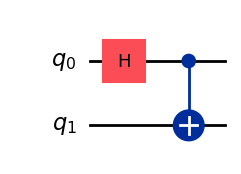

In [6]:
# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")

In [10]:
# Set up six different observables.
observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]

In [11]:
observables

[SparsePauliOp(['IZ'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['IX'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['ZI'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['XI'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['ZZ'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['XX'],
               coeffs=[1.+0.j])]

Qiskit provides two ways to return data: 

you can obtain a probability distribution for a set of qubits you choose to measure,

you can obtain the expectation value of an observable

This example measures expectation values by using the qiskit.quantum_info submodule, which is specified by using operators (mathematical objects used to represent an action or process that changes a quantum state

https://github.com/ketayon?tab=repositories

In [17]:

from qiskit import *
from qiskit.visualization import plot_histogram, array_to_latex, plot_bloch_multivector
%matplotlib inline

In [42]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
circuit = QuantumCircuit(qr, cr)
circuit.measure(qr, cr)

In [43]:
from qiskit_aer import Aer

In [44]:

simulator = Aer.get_backend('qasm_simulator')

In [45]:
# simulator = Aer.get_backend('statevector_simulator')
compiled_circuit = transpile(circuit, simulator)
sim_result = simulator.run(compiled_circuit).result() 
print(sim_result)

Result(backend_name='qasm_simulator', backend_version='0.13.3', qobj_id='', job_id='390acb72-be04-4ae5-817e-e6c4ffba60c4', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 1024}), header=QobjExperimentHeader(creg_sizes=[['c2', 1]], global_phase=0.0, memory_slots=1, n_qubits=1, name='circuit-175', qreg_sizes=[['q3', 1]], metadata={}), status=DONE, seed_simulator=535702227, metadata={'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 1, 'num_clbits': 1, 'time_taken': 0.0017379, 'sample_measure_time': 0.0005474, 'input_qubit_map': [[0, 0]], 'max_memory_mb': 8072, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 8, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'enabled': False}}, time_taken=0.0017379)], date=2025-03-22T11:52:25.678959, statu

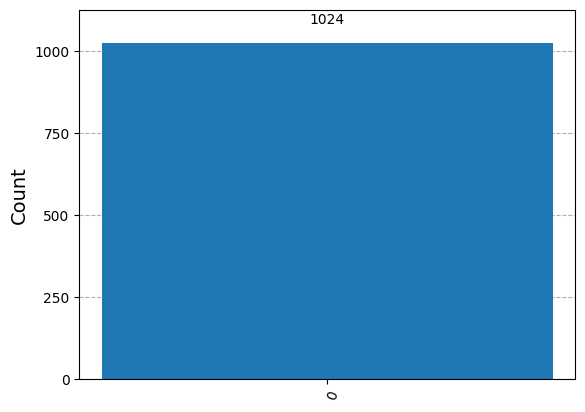

In [46]:
plot_histogram(sim_result.get_counts())

In [47]:
simulator = Aer.get_backend('statevector_simulator')
compiled_circuit = transpile(circuit, simulator)
sim_result = simulator.run(compiled_circuit, shots=1024).result() 
statevector = sim_result.get_statevector()
print(statevector)


Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


In [48]:
array_to_latex(statevector)

<IPython.core.display.Latex object>

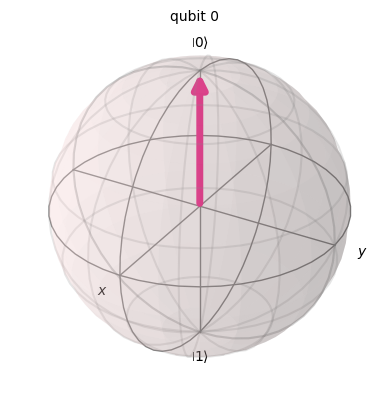

In [49]:
plot_bloch_multivector(statevector)

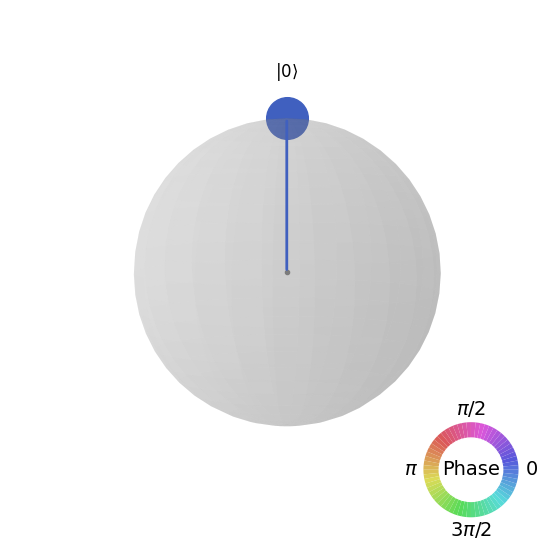

In [50]:
plot_state_qsphere(statevector)

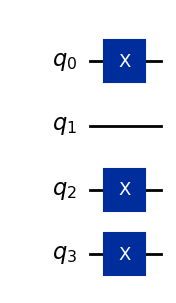

In [34]:
circuit = QuantumCircuit(4)
circuit.x([0, 2, 3]) # apply not on 0, 2, 3
circuit.draw(output='mpl')

In [35]:
simulator = Aer.get_backend('statevector_simulator')

In [36]:
compiled_circuit = transpile(circuit, simulator)
sim_result = simulator.run(compiled_circuit).result() 
statevector = sim_result.get_statevector()
print(statevector)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))


In [37]:
array_to_latex(statevector)

<IPython.core.display.Latex object>

this vector representation, each element corresponds to a basis state in the 4-qubit Hilbert space. The basis states are ordered in the following way:
|0000, |0001, |0010, |0011, |0100, |0101, |0110, |0111, |1000, |1001, |1010, |1011, |1100, |1101, |1110, |1111

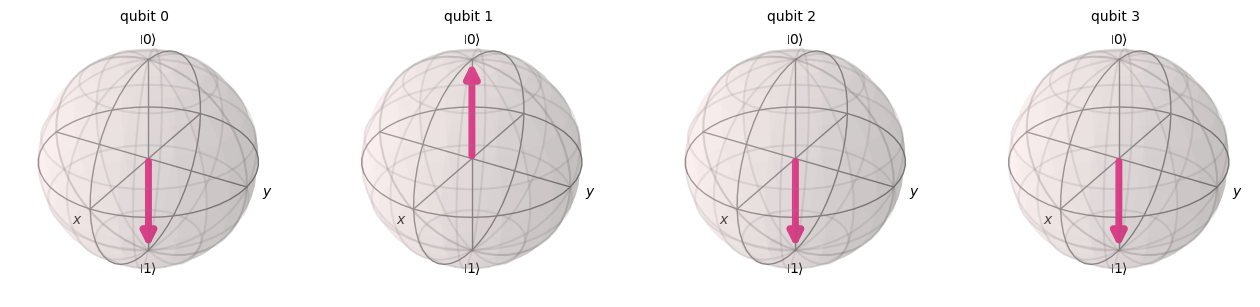

In [38]:
plot_bloch_multivector(statevector)

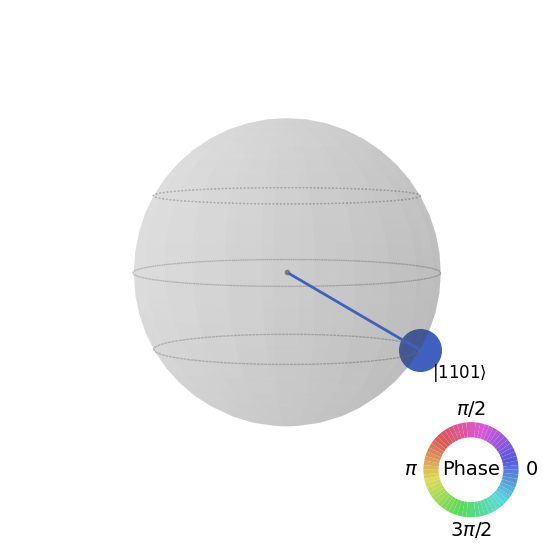

In [39]:
plot_state_qsphere(statevector)

In [40]:
from math import pi